In [ ]:
import pandas as pd

prostate_cancer_data = pd.read_csv("Prostate_Cancer.csv")

#Data Exploration

In [ ]:
prostate_cancer_data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
print(prostate_cancer_data.isnull().sum())

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64


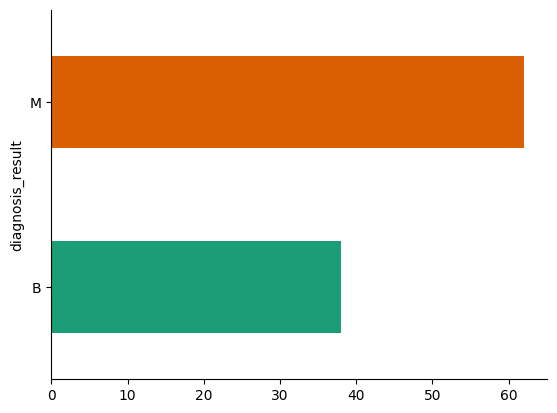

In [ ]:
# Consideration: unbalanced classes
import seaborn as sns
import matplotlib.pyplot as plt
prostate_cancer_data.groupby('diagnosis_result').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

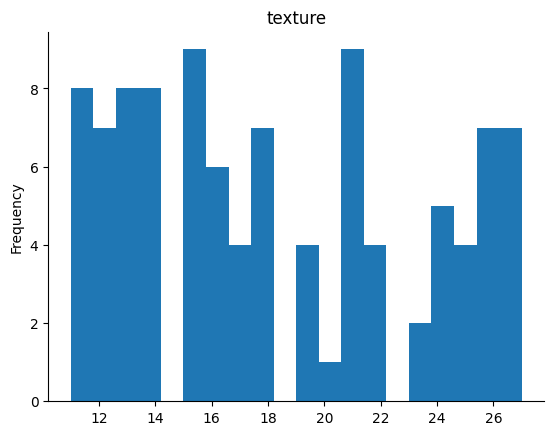

In [ ]:
from matplotlib import pyplot as plt
prostate_cancer_data['texture'].plot(kind='hist', bins=20, title='texture')
plt.gca().spines[['top', 'right',]].set_visible(False)

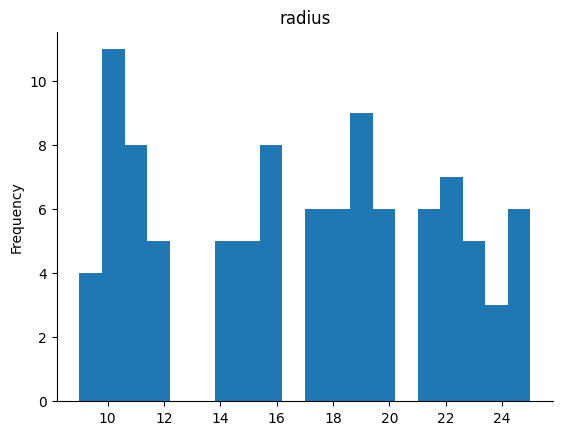

In [ ]:
prostate_cancer_data['radius'].plot(kind='hist', bins=20, title='radius')
plt.gca().spines[['top', 'right',]].set_visible(False)

#Data Preprocessing

In [ ]:
trim_prostate_cancer_data = prostate_cancer_data.drop("id", axis=1)
unlabled_data = trim_prostate_cancer_data.drop("diagnosis_result", axis = 1)

label_mapping = {'M': 1, 'B': 0}
labels = trim_prostate_cancer_data["diagnosis_result"].map(label_mapping)

# Basic Decision Tree
Intuition: Decision Trees work well with smaller datasets and are less likely to overfit. Random forest improves on the generalization further by using an ensemble model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(unlabled_data, labels, test_size=0.2)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.75
Confusion Matrix:
 [[8 1]
 [4 7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.88      0.64      0.74        11

    accuracy                           0.75        20
   macro avg       0.77      0.76      0.75        20
weighted avg       0.78      0.75      0.75        20



In [ ]:
pip install graphviz pydotplus


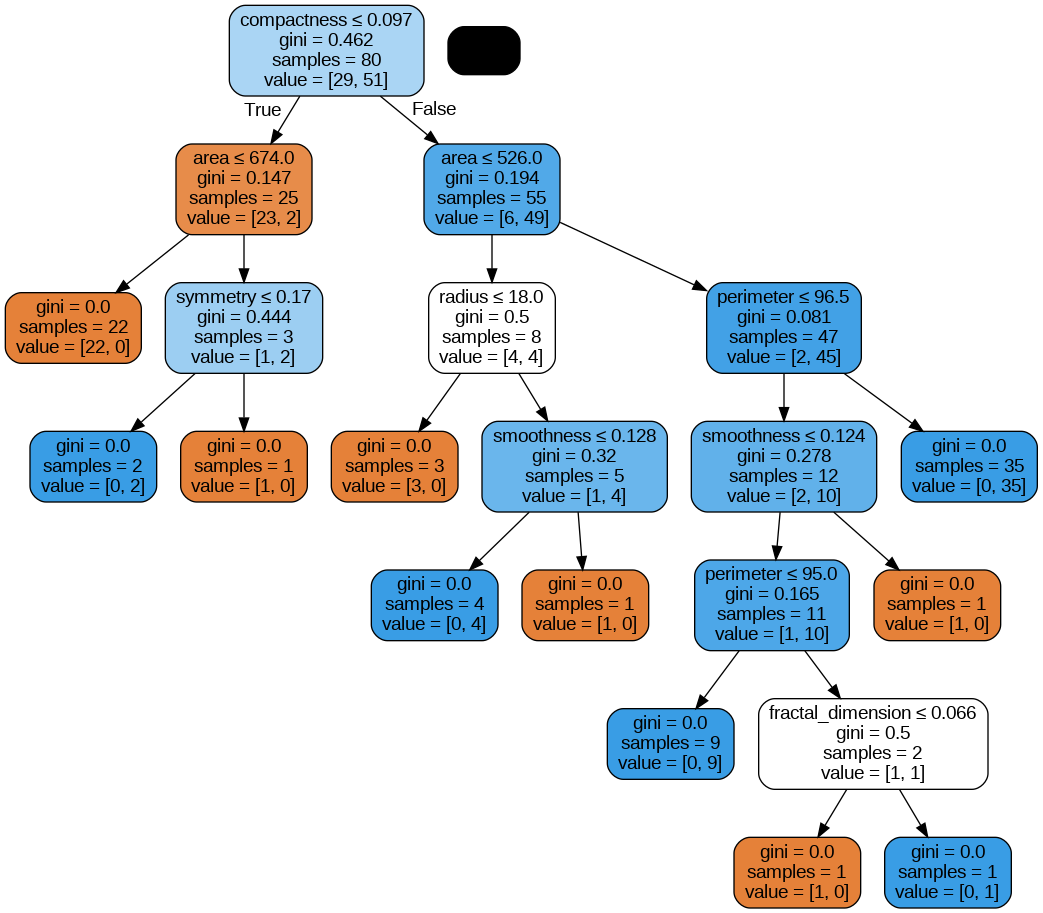

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=unlabled_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#Tuning Hyperparameters (making it shallower)

Looking at the visualization above, I suspect the model is overfitting.

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 6, 7, 8, 4, 3, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# dt_model = DecisionTreeClassifier()
# grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
best_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 10)
best_dt_model.fit(X_train, y_train)
y_pred = best_dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.65
Confusion Matrix:
 [[8 1]
 [6 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.89      0.70         9
           1       0.83      0.45      0.59        11

    accuracy                           0.65        20
   macro avg       0.70      0.67      0.64        20
weighted avg       0.72      0.65      0.64        20



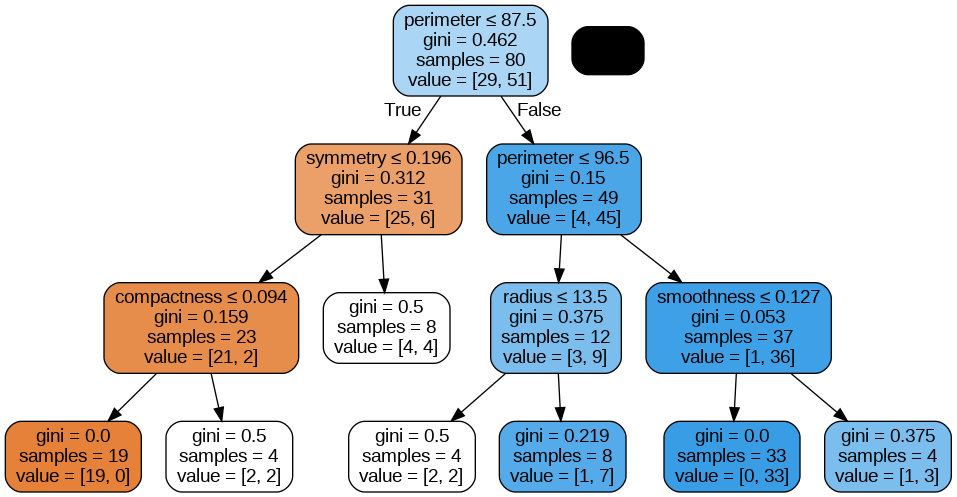

In [ ]:
dot_data = StringIO()
export_graphviz(best_dt_model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=unlabled_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8
Confusion Matrix:
 [[8 1]
 [3 8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.89      0.73      0.80        11

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20

